## Importing libraries

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import log_loss, f1_score, roc_auc_score, ConfusionMatrixDisplay

## Importing the data

In [72]:
cancer_data = pd.read_csv('./data/breast-cancer.csv')
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


- First will drop id columns and will encode diagnosis column, where B = 0 and M = 1

In [73]:
cancer_data.drop(columns='id', inplace = True)
cancer_data['diagnosis'] = cancer_data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [74]:
cancer_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [75]:
cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- Don't have any null value in the dataset

In [76]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [77]:
X = cancer_data.drop(columns='diagnosis')
y = cancer_data['diagnosis'] 

Text(0.5, 1.0, 'Feature Importance based on Mutual Information')

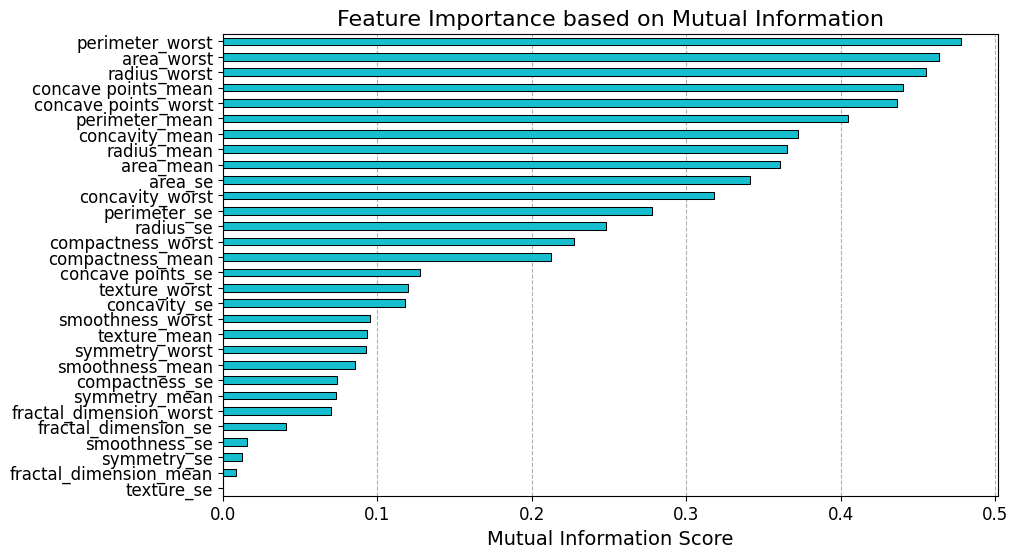

In [78]:
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values()
fig_corre = mi_series.plot.barh(figsize=(10,6), color="#17BECF", edgecolor='black', linewidth=0.75, zorder=2)
fig_corre.set_xlabel("Mutual Information Score", fontsize=14)
fig_corre.tick_params(axis='both', which='major', labelsize=12)
fig_corre.grid(axis='x', linestyle='--', zorder=1)
plt.title("Feature Importance based on Mutual Information", fontsize=16)

### Selecting just those features which correlation with the target is higher than 0.3

In [79]:
X_selected = X.loc[:, mi_series > 0.3]
X_selected

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.30010,0.14710,153.40,25.380,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.08690,0.07017,74.08,24.990,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.19740,0.12790,94.03,23.570,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.24140,0.10520,27.23,14.910,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.19800,0.10430,94.44,22.540,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.24390,0.13890,158.70,25.450,166.10,2027.0,0.4107,0.2216
565,20.13,131.20,1261.0,0.14400,0.09791,99.04,23.690,155.00,1731.0,0.3215,0.1628
566,16.60,108.30,858.1,0.09251,0.05302,48.55,18.980,126.70,1124.0,0.3403,0.1418
567,20.60,140.10,1265.0,0.35140,0.15200,86.22,25.740,184.60,1821.0,0.9387,0.2650


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'area_se'}>],
       [<Axes: title={'center': 'radius_worst'}>,
        <Axes: title={'center': 'perimeter_worst'}>,
        <Axes: title={'center': 'area_worst'}>],
       [<Axes: title={'center': 'concavity_worst'}>,
        <Axes: title={'center': 'concave points_worst'}>, <Axes: >]],
      dtype=object)

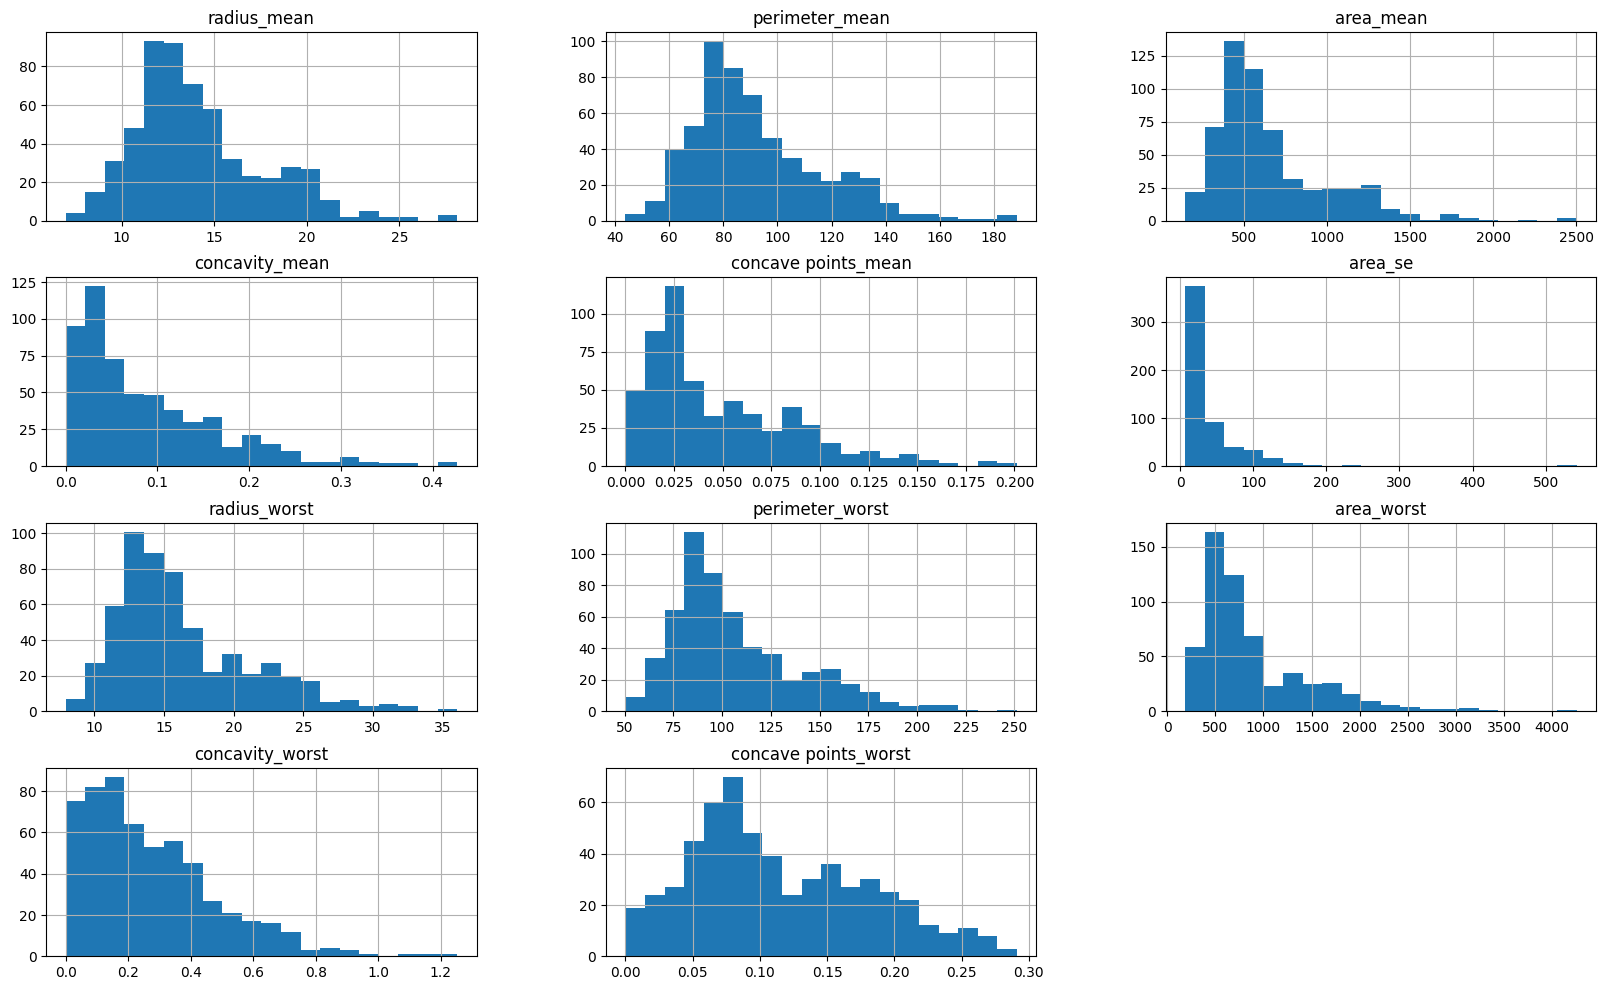

In [80]:
X_selected.hist(bins = 20, figsize=(20,12))

In [81]:
X_selected[X_selected['area_worst'] > 3500]

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
461,27.42,186.9,2501.0,0.3635,0.1689,542.2,36.04,251.2,4254.0,0.6833,0.2625


- It seems there isn't any outlier in the data, just one entry that is a cancer with a hugh area

### Defining our benchmark models

In [82]:
models = {
    'logistic_regression' : Pipeline(steps = 
     [
         ('scaler', StandardScaler()),
         ('log_reg', LogisticRegression())
     ]                         ),

     'knn_clasiffier' : Pipeline(steps = 
     [
         ('scaler', StandardScaler()),
         ('knn_class', KNeighborsClassifier())
     ]                         ),

     'rf_classifier' : RandomForestClassifier(),
     'gb_classifier' : GradientBoostingClassifier()
}

Training logistic_regression now
Training knn_clasiffier now
Training rf_classifier now
Training gb_classifier now


,model,log_loss,f1_score,roc_auc
0,logistic_regression,0.064278,0.964706,0.998690
2,rf_classifier,0.091474,0.941176,0.995742
3,gb_classifier,0.134121,0.941176,0.994104
1,knn_clasiffier,0.357793,0.976744,0.991811


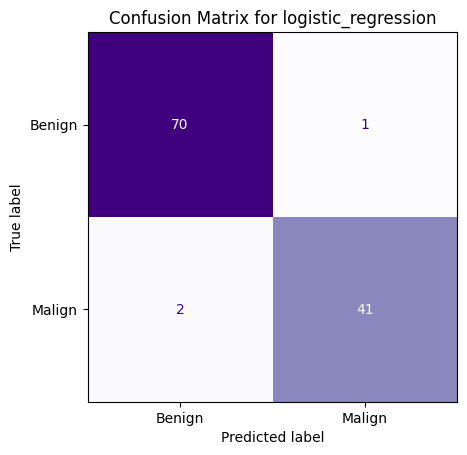

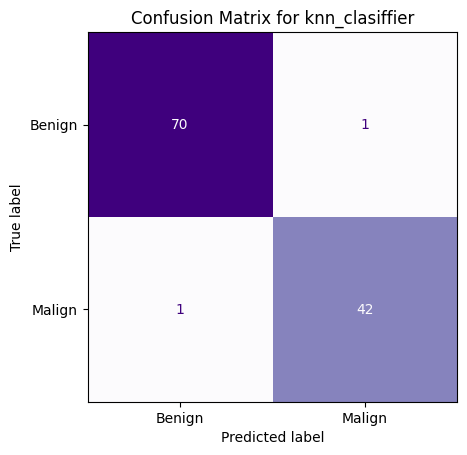

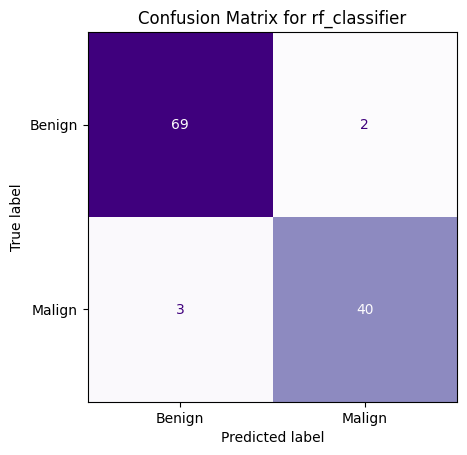

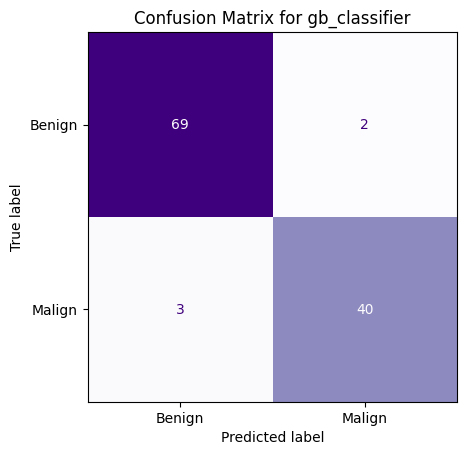

In [83]:
results = []
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    print(f'Training {model_name} now')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    logloss = log_loss(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Purples', display_labels=['Benign', 'Malign'], colorbar=False)
    disp.ax_.set_title(f'Confusion Matrix for {model_name}')

    results.append(
        {
            'model' : model_name,
            'log_loss' : logloss,
            'f1_score' : f1,
            'roc_auc' : roc_auc
        }
    )

results_df = pd.DataFrame(results)
results_df.sort_values(by = 'roc_auc', ascending=False, inplace=True)
results_df

- Without hyperparameters tuning the best 2 that are working are **knn_classifier** and **logistic_regression**

## Grid Search CV

### Random Forest

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best ROC AUC Score: 0.987797910782858


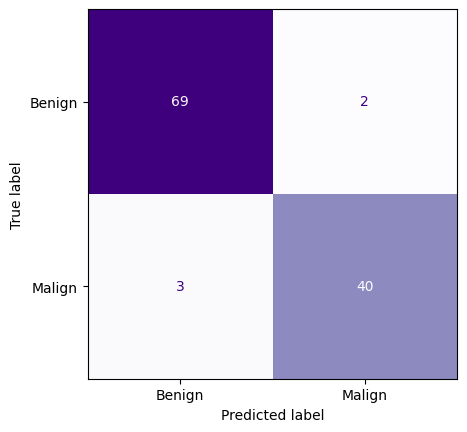

In [84]:
rf_classifier = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

grid_rf = grid_search_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(grid_rf, X_test, y_test, cmap='Purples', display_labels=['Benign', 'Malign'], colorbar=False)
disp.ax_.set_title(f'Confusion Matrix for tunned {model_name}')

print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best ROC AUC Score:", grid_search_rf.best_score_)

### Gradient Boosting

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best ROC AUC Score: 0.987797910782858


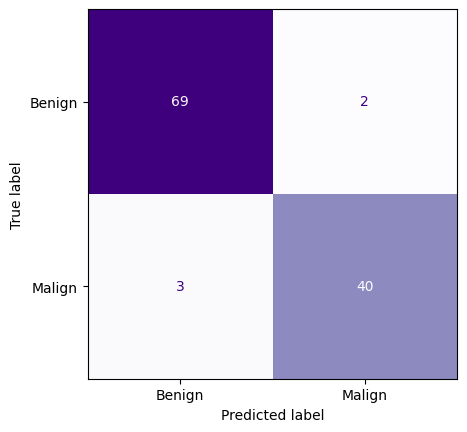

In [85]:
gb_classifier = RandomForestClassifier(random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(estimator=gb_classifier, param_grid=param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)

grid_gb = grid_search_gb.fit(X_train, y_train)
y_pred = grid_gb.predict(X_test)

ConfusionMatrixDisplay.from_estimator(grid_gb, X_test, y_test, cmap='Purples', display_labels=['Benign', 'Malign'], colorbar=False)
disp.ax_.set_title(f'Confusion Matrix for tunned {model_name}')

print("Best Hyperparameters:", grid_search_gb.best_params_)
print("Best ROC AUC Score:", grid_search_gb.best_score_)

### KNN_Classifier

Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 20, 'weights': 'distance'}
Best ROC AUC Score: 0.9739886319153961


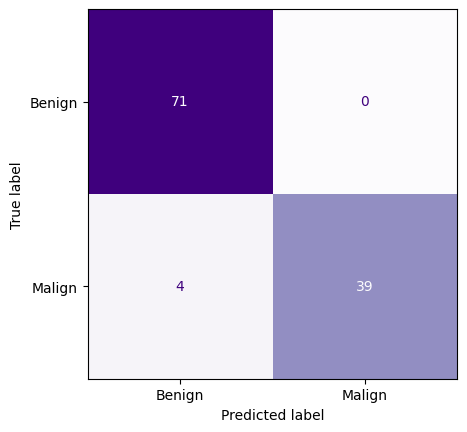

In [86]:
knn_classifier = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [5, 10, 20],
    'weights': [None,'uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [30, 40, 50]
}

grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)

grid_knn = grid_search_knn.fit(X_train, y_train)
y_pred = grid_knn.predict(X_test)

ConfusionMatrixDisplay.from_estimator(grid_knn, X_test, y_test, cmap='Purples', display_labels=['Benign', 'Malign'], colorbar=False)
disp.ax_.set_title(f'Confusion Matrix for tunned {model_name}')

print("Best Hyperparameters:", grid_search_knn.best_params_)
print("Best ROC AUC Score:", grid_search_knn.best_score_)

- Logistic Regression has only one tunable parameter and isn't changing a lot the final result
- **RF_Classifier**, **GB_Classifier** and **KNN_Classifier** the default hyperparameters are working better than those selected for the **Grid Search**